<center>
    <img src="/Users/imb/2024/ironhack/data_curriculum/ai_assignment/img/logo2.png" width="200" />
</center>

<h2 style="color: #00BFFF;">Lab - Experimenting with CNN Architecture</h2>

<h3 style="color: #0099CC;">Prerequisites:</h3>

Before starting this lab, make sure you are familiar with:
- Convolutional Neural Networks (CNNs)
- PyTorch basics
- Building and training neural networks

In [1]:
import cv2 
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

## Challenge 1: Understanding Convolutional Layers

In this exercise, you will modify the number of filters in a convolutional layer and observe the impact on the feature maps.

### Instructions:
- Define a simple CNN with one convolutional layer.
- Change the number of filters in the convolutional layer.
- Visualize the feature maps after the convolution operation.

### Task:
1. Start with a CNN that has a single convolutional layer with 16 filters.
2. Apply a 3x3 kernel, stride of 1, and no padding.
3. Pass a sample image through the network and visualize the output feature maps.

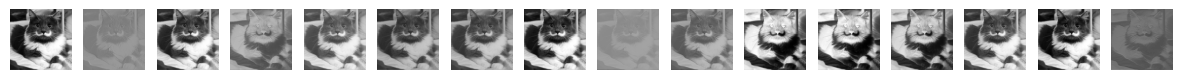

In [2]:
# Sample image
sample_image = cv2.imread('/Users/imb/2024/ironhack/data_curriculum/ai_assignment/img/cat.png', 0) # 0 for grayscale
# Convert image to a PyTorch tensor and add batch & channel dimensions
sample_image = torch.tensor(sample_image, dtype=torch.float32)  # Convert to float tensor
sample_image = sample_image.unsqueeze(0).unsqueeze(0)  # Batch and channel dimensions (1, 1, H, W)

# Define a CNN model
class SimpleCNN(nn.Module):
    def __init__(self, num_filters):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=num_filters, kernel_size=3, stride=1, padding=0)

    def forward(self, x):
        return self.conv1(x)

# Instantiate model with 16 filters
model = SimpleCNN(num_filters=16)

# Forward pass
output = model(sample_image)

# Visualize feature maps
fig, axes = plt.subplots(1, 16, figsize=(15, 15))
for i in range(16):
    axes[i].imshow(output[0, i].detach().numpy(), cmap='gray')
    axes[i].axis('off')
plt.show()

## Challenge 2: Experimenting with Pooling Layers

Explore the effects of different pooling strategies on feature maps.

### Instructions:
- Define a CNN with max pooling and average pooling layers.
- Compare the effects of each pooling strategy on the size of the feature maps.

### Task:
1. Build a CNN with one convolutional layer followed by both max pooling and average pooling layers.
2. Use a 2x2 kernel for the pooling layers.
3. Pass a sample image through both networks and compare the resulting feature maps.

In [3]:
# Define CNN with Max Pooling and Average Pooling
class PoolingCNN(nn.Module):
    def __init__(self):
        super(PoolingCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, 1)
        self.max_pool = nn.MaxPool2d(2, 2)
        self.avg_pool = nn.AvgPool2d(2, 2)

    def forward(self, x, pooling_type='max'):
        x = self.conv1(x)
        if pooling_type == 'max':
            return self.max_pool(x)
        elif pooling_type == 'avg':
            return self.avg_pool(x)

# Instantiate the model
model_max = PoolingCNN()
model_avg = PoolingCNN()

# Forward pass
output_max = model_max(sample_image, pooling_type='max')
output_avg = model_avg(sample_image, pooling_type='avg')

# Compare sizes
print(f"Max pooling output size: {output_max.size()}")
print(f"Avg pooling output size: {output_avg.size()}")

Max pooling output size: torch.Size([1, 16, 356, 358])
Avg pooling output size: torch.Size([1, 16, 356, 358])


## Challenge 3: Adjusting Hyperparameters

Investigate the effect of changing kernel size, stride, and padding on feature maps.

### Instructions:
- Modify the kernel size, stride, and padding in a convolutional layer.
- Observe the impact of these changes on the output feature map size.

### Task:
1. Use a CNN with different kernel sizes (3x3, 5x5) and strides (1, 2).
2. Add padding to ensure the output size is the same as the input size.
3. Print the size of the output feature maps for each configuration.

In [4]:
# Define CNN with variable kernel size, stride, and padding
class HyperparamCNN(nn.Module):
    def __init__(self, kernel_size, stride, padding):
        super(HyperparamCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=kernel_size, stride=stride, padding=padding)

    def forward(self, x):
        return self.conv1(x)

# Experiment with different hyperparameters
for kernel_size, stride, padding in [(3, 1, 1), (5, 2, 2)]:
    model = HyperparamCNN(kernel_size=kernel_size, stride=stride, padding=padding)
    output = model(sample_image)
    print(f"Kernel Size: {kernel_size}, Stride: {stride}, Padding: {padding} -> Output size: {output.size()}")


Kernel Size: 3, Stride: 1, Padding: 1 -> Output size: torch.Size([1, 16, 715, 718])
Kernel Size: 5, Stride: 2, Padding: 2 -> Output size: torch.Size([1, 16, 358, 359])
